# Medical cost analysis and predictor

## In this program, we take a dataset of medical charges, along with the age, sex, bmi, number of children, smoker status, and region of the patient. 

### We graph the data to find patterns in the distribution of costs. 

### We create a heatmap to show the correlation between age, sex, bmi, region, smoker status, and medical charges. 

### finally, we create an interactice interface where you can input your own informaiton and get a prediction of charges. 



In [1]:
import numpy as np
import pandas as pd
df= pd.read_csv("Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
import matplotlib.pyplot as plt

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [109]:
max_charge= df["charges"].max()
min_charge= df["charges"].min()
mean_charge = df["charges"].mean()
median_charge = df["charges"].median()
print("The minimum charge in our set is $" + str(min_charge) + ", and the maximum charge in our set is $" + (str(max_charge)))
print("The mean charge is $" +str(mean_charge )+ " and the median charge is $" + str(median_charge))
     

The minimum charge in our set is $1121.8739, and the maximum charge in our set is $63770.42801
The mean charge is $13270.422265141257 and the median charge is $9382.033


### Most of our patients are nonsmokers.

Text(0.5, 1.0, 'smokers compared to nonsmokers')

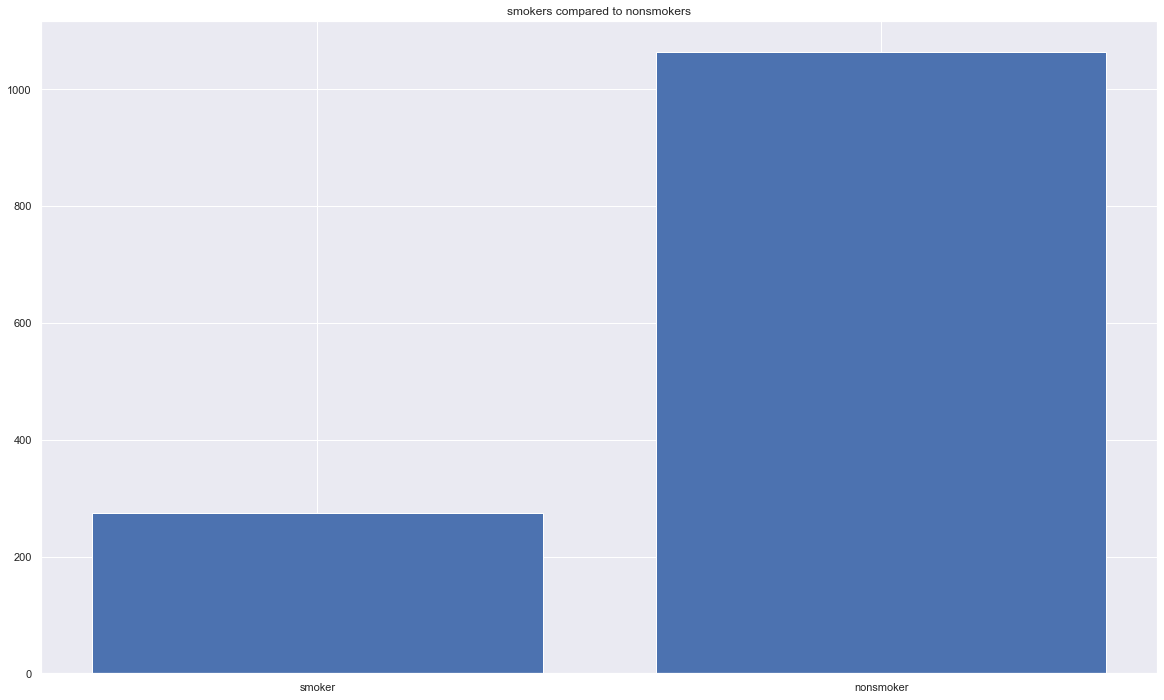

In [64]:
yes= df["smoker"].loc[(df["smoker"]=="yes")].count()

no=df["smoker"].loc[(df["smoker"]=="no")].count()

df_smoke=  pd.DataFrame({'smoker':['smoker', 'nonsmoker'], 'val':[274, 1064]})

x = np.array(["smoker", "nonsmoker"])
y = np.array([274, 1064])
plt.bar(x,y)
plt.title("smokers compared to nonsmokers")

In [106]:
smoker_charges= df.loc[(df["smoker"]=="yes")].charges.mean()
smoker_charges

non_smoker_charges= df.loc[(df["smoker"]=="no")].charges.mean()

times_greater = round((smoker_charges/non_smoker_charges),2)
print( "a smoker's costs are on average " + str(times_greater) + " times more than those of a nonsmoker.")


a smoker's costs are on average 3.8 times more than those of a nonsmoker.


### Smokers have much higher medical bills than nonsmokers.

In [5]:
df["region"].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution of patient ages')

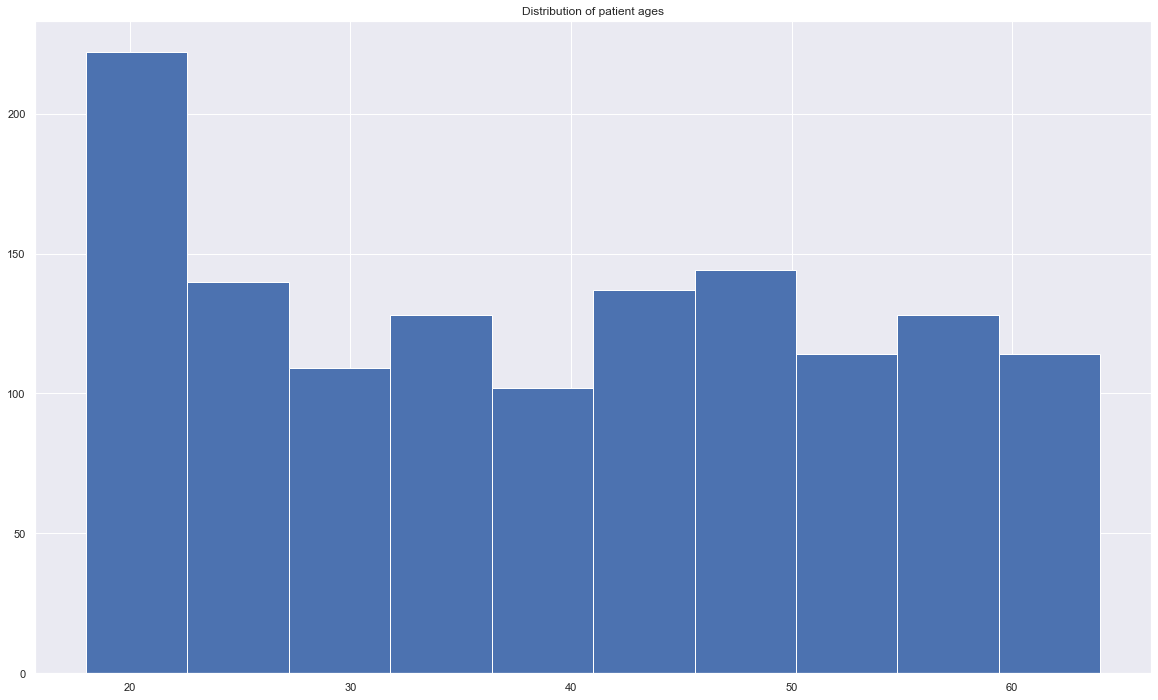

In [59]:

df['age'].hist()
plt.title('Distribution of patient ages')

Text(0.5, 0, 'charges')

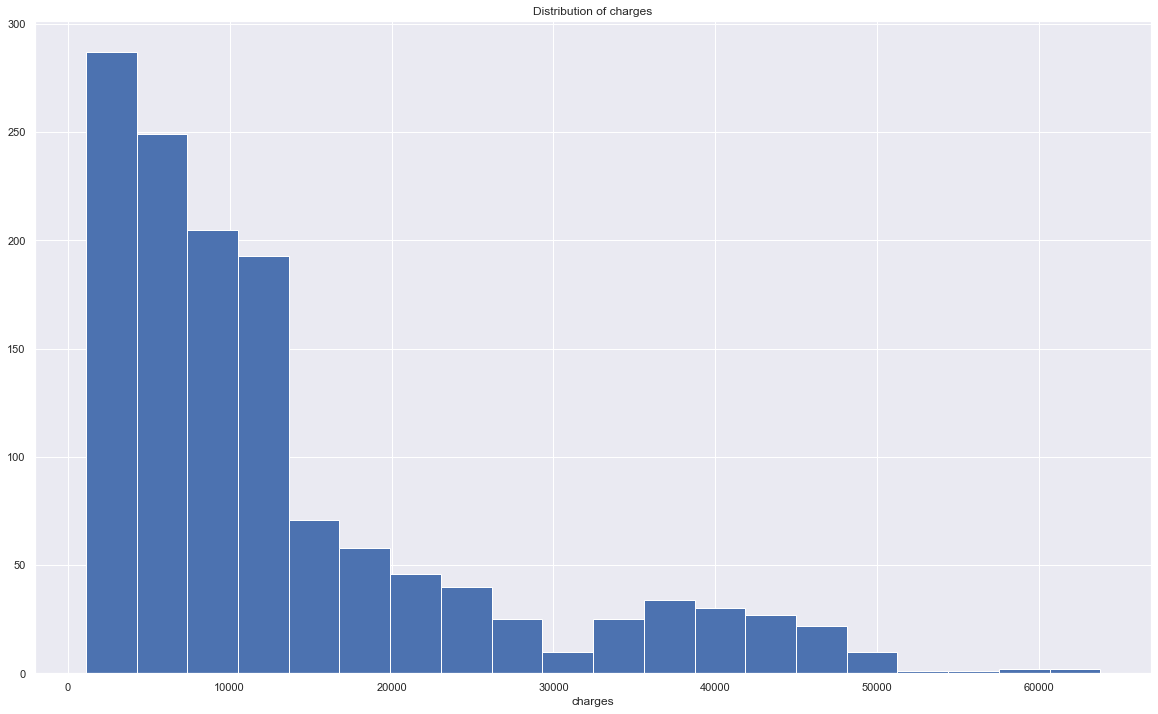

In [105]:
df['charges'].hist(bins= 20)
plt.title('Distribution of charges')
plt.xlabel("charges")


Text(0.5, 1.0, 'distribution of number of children patients have')

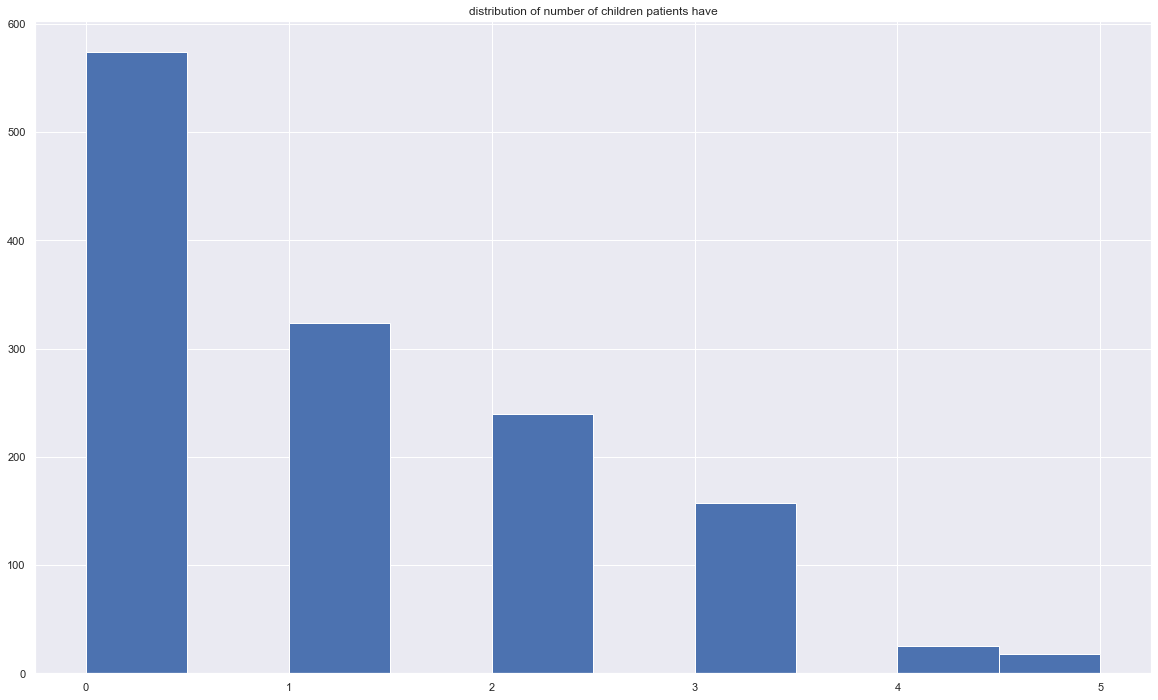

In [61]:
df['children'].hist()
plt.title('distribution of number of children patients have')

In [84]:
regions= ["northeast", "southeast", "northwest", "southwest"]
for r in regions:
    region_charges = df.loc[(df["region"]==r)]
    means= region_charges["charges"].mean()
    means= round(means,2)
    print("The average cost in the " + str(r) + " is $" + str(means))

The average cost in the northeast is $13406.38
The average cost in the southeast is $14735.41
The average cost in the northwest is $12417.58
The average cost in the southwest is $12346.94


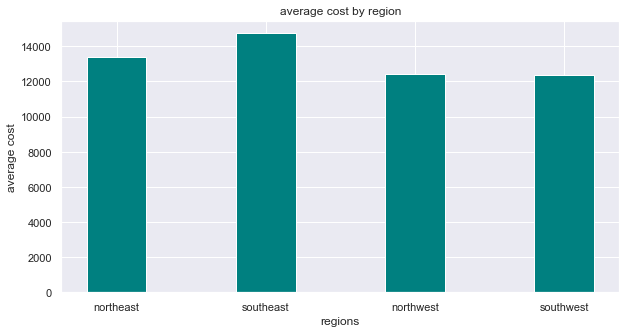

In [87]:
data = {'northeast':13406.38, 'southeast':14735.41, 'northwest':12417.58,
        'southwest':12346.94}


regions = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(regions, values, color ='teal',
        width = 0.4)
 
plt.xlabel("regions")
plt.ylabel("average cost")
plt.title("average cost by region")
plt.show()

In [11]:
import seaborn as sns

In [12]:
df_dummies = pd.get_dummies(df)
df_dummies

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


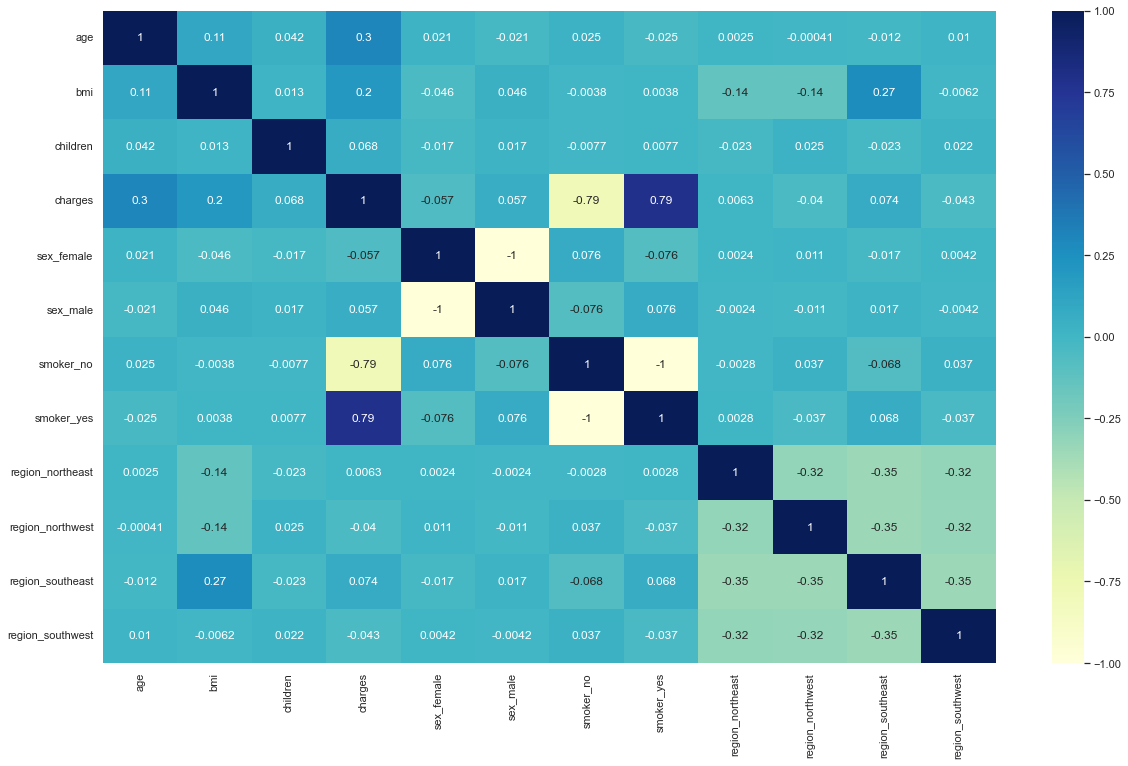

In [14]:
df_dummies_pearson = df_dummies.corr(method='pearson')
sns.set(rc = {'figure.figsize':(20, 12)})
go=sns.heatmap(df_dummies_pearson, annot=True, cmap="YlGnBu")

ax = go

## smoking, age and bmi are correlated with cost

In [23]:
female_charges =  df.loc[(df["sex"]=="female")].charges.mean()
female_charges

12569.57884383534

In [24]:
male_charges =  df.loc[(df["sex"]=="male")].charges.mean()
male_charges

13956.751177721886

In [25]:
times_greater_gender = round((male_charges/female_charges),2)
print( "a man's costs are on average " + str(times_greater_gender) + " times more than those of a woman.")



a man's costs are on average 1.11 times more than those of a woman.


In [27]:
old_charge= df.loc[(df["age"]>=60)].charges.mean()

young_charge= df.loc[(df["age"]<=29)].charges.mean()

age_charge= round((old_charge/young_charge), 2)
print("People over sixty pay on average " + str(age_charge) + " times more than people under 29.")

People over sixty pay on average 2.31 times more than people under 29.


In [31]:
big_charge= df.loc[(df["bmi"]>=35)].charges.mean()
big_charge

16953.82361816456

In [30]:
little_charge= df.loc[(df["bmi"]<20)].charges.mean()
little_charge 

8838.561135121954

In [32]:
bmi_charge= round((big_charge/little_charge), 2)
print("People with the highest bmi pay on average " + str(bmi_charge) + " times more than people with the lowest bmi.")



People with the highest bmi pay on average 1.92 times more than people with the lowest bmi.


In [34]:
from sklearn import linear_model

In [35]:
df["region_code"]=np.where (df["region"]=="southeast", 1, 
    np.where(df["region"]=="northeast", 2,
            np.where(df["region"]=="southwest", 3,
                    np.where(df["region"]=="northwest", 4, 0))))


In [36]:
df["smoker_code"]=np.where (df["smoker"]=="yes", 1, 
    np.where(df["smoker"]=="no", 0,2))


In [37]:
df["gender_code"]=np.where (df["sex"]=="female", 1, 
    np.where(df["sex"]=="male", 0,2))


In [38]:
x = df[["smoker_code", "gender_code","children","bmi",  "region_code",  "age"]]
y = df["charges"]

regr = linear_model.LinearRegression()
regr.fit(x, y)


predicted_price= regr.predict([[1,1,2,3,1,40]])
predicted_price

array([23742.4724074])

## Run the following code to input your informaton and get an estimated cost

In [54]:
listy = []
smoke= input("Do you smoke? ")
if smoke =="yes":
    listy.append(1)
else: 
    listy.append(0)
gender= input("Are you male or female? ")
if gender =="female":
    listy.append(1)
else: 
    listy.append(0)
children= input("how many children do you have? ")
children= int(children)
listy.append(children)

know_bmi= input("do you know your bmi? ")
if know_bmi=="no":
    height= input("what is your height in inches? ")
    height= int(height)
    weight = input("what is your weight in pounds? ")
    weight= int(weight)
    bmi= round(float((weight / height ** 2)*703),2)
    print("your bmi is " + str(bmi))
else: 
    bmi= input("what is your bmi? ")
    bmi=float(bmi)
listy.append(bmi)

region= input("Where do you live: northeast, northwest, southest, or southwest?")

if region == "northeast": 
    listy.append(2)
elif region == "northwest":
    listy.append(4)
elif region =="southwest":
    listy.append(3)
elif region== "southeast":
    listy.append(1)
else:
    listy.append(0)
    
age= input("how old are you? ")
age= int(age)
listy.append(age)
    
print(listy)

predicted_price= regr.predict([listy])

price= predicted_price[0]
price= round(price,2)
print( "Your estimated price is $" + str(price))

Do you smoke? no
Are you male or female? male
how many children do you have? 1
do you know your bmi? no
what is your height in inches? 70
what is your weight in pounds? 200
your bmi is 28.69
Where do you live: northeast, northwest, southest, or southwest?southwest
how old are you? 57
[0, 0, 1, 28.69, 3, 57]
Your estimated price is $12273.38
